Open in Colab badge. Replace at end of the link with final file name on Github
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/dianakorka/dmml2021/blob/main/Assignment2_2021.ipynb)

# Data Mining and Machine Learning - Assignment 2

> Topics Covered: Classification & Text Analytics (week 5 to week 8)

**Due: Sunday November 21, 23.59pm**


To complete the assignment you have to do ***both***:

1. Complete the exercises and submit your Python notebook **ADD LINK**
2. Answer the questions to the quiz on Moodle **ADD LINK** (Note: You can only complete the quiz one time. Have your notebook ready for answering the quiz) 

The answers to the quiz should be supported by your code in the notebook. If they are not you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack (channel #assignment2_questions).


If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repo for updates.

To get started, run the first few cells to load the dataset and then check out the questions.

Good luck!

In [1]:
# Import requiered packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

**Important!**

**For all the questions below, fix the seed of random generators to 72.**

In [ ]:
np.random.seed = 72

## 1. Classification

### Load the data

For the first part we use employee retention data from [Kaggle](https://www.kaggle.com/pankeshpatel/hrcommasep). The dataset contains HR information on a company's employees such as:
* satisfaction level, 
* score of the last evaluation they received, 
* number of projects in which the employee is involved, 
* average hours worked per month
* years spent with the company
* whether they experiences a work accident
* whether they left thier job or stayed
* whether they received a promotion in the last 5 years
* the department in which they work
* whether their salary was low, medium or high.

Your task is to build a model that predicts whether the employee stays (0) or leaves the company (1).

In [2]:
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/dianakorka/dmml2021/main/data/HR_comma_sep.csv?token=AC35JB53VSUNHXW3OVFYWDTBD7ZOY')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. How many rows and columns does the dataset have?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. What is the base rate for staying with the company ?

In [ ]:
np.max(df.left.value_counts()/df.shape[0])

0.7619174611640777


### Training¶

For this section, train a logistic regression model on this dataset. Use all of the features in the dataset. 

1.1. First, for the categorical features, encode salary with ordinal encoding and department with one hot encoding. 



In [ ]:
df[['Department', 'salary']].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler

For the ordinal encoding you should set your own dictionary such that low corresponds to 2, 1 to medium and 0 to high. (Gives better regression metrics)

In [ ]:
oe=OrdinalEncoder()
oe.set_params(categories= [['high', 'medium', 'low']])
oe_salary= oe.fit_transform(df[['salary']])
oe.categories_

[array(['high', 'medium', 'low'], dtype=object)]

In [ ]:
oe_salary=pd.DataFrame(oe_salary, columns=['salary_encoded'])

In [ ]:
oe_salary.iloc[:,0].value_counts()

2.0    7316
1.0    6446
0.0    1237
Name: salary_encoded, dtype: int64

Alternative with LabelEncoder

In [ ]:
le_salary=pd.Series(LabelEncoder().fit_transform(df.salary), name='le_salary')
le_salary.value_counts()

1    7316
2    6446
0    1237
Name: le_salary, dtype: int64

For department

In [ ]:
one_hot=OneHotEncoder(sparse=False)
dep_one_hot=one_hot.fit_transform(df[['Department']])
dep_one_hot=pd.DataFrame(dep_one_hot, columns=one_hot.categories_)
dep_one_hot.sample()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
10778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


1.2. Now concatenate all the features (department one hot-encoded and encoded salary) to the initiatial dataframe. You can use pd.concat function.

In [ ]:
data=pd.concat([df, dep_one_hot, le_salary, oe_salary], axis=1)
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",le_salary,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2.0


1.3. Generate a pairplot to see the relationships between satisfaction, evaluation, number of projects, monthly hours and time spent with the company, when accounting for whether the employee has left or not (set hue='left).

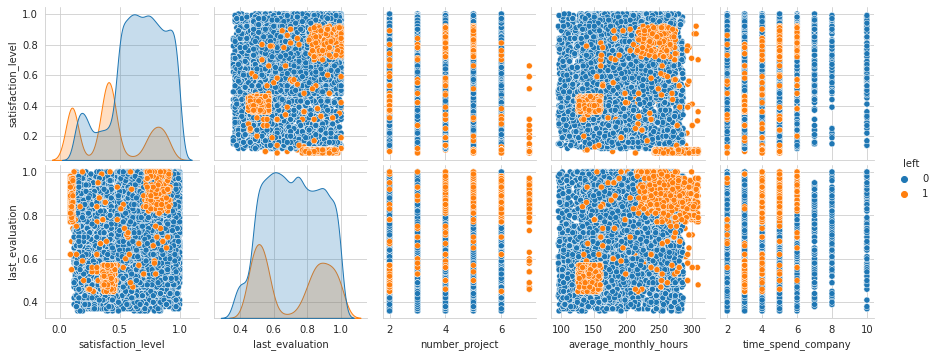

In [ ]:
sns.pairplot(x_vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company'], 
             y_vars=['satisfaction_level' ,'last_evaluation'], data=data, hue='left');

1.4. Create a new interaction variable equal to the product of the last evaluation score and time spent with the company.

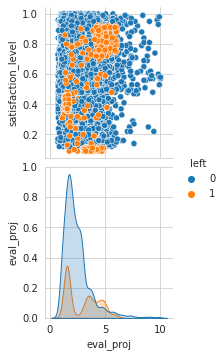

In [ ]:
data['eval_spend']=data.last_evaluation*data.time_spend_company
sns.pairplot(x_vars='eval_proj', y_vars=['satisfaction_level', 'eval_proj'], data=data, hue='left')


1.5. Train/test splitting¶: Now split the data into 80% training and 20% test set. Remember to set the random seed to 72.


In [ ]:
y=data.left
X=data.drop(['left', 'le_salary', 'Department', 'salary'], axis=1)
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",salary_encoded,eval_proj,eval_spend
0,0.38,0.53,2,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.59,1.59


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

1.6. Standardization: Standardize only the numerical features (not the categorical features) to have mean zero and standard deviation equal to 1. You can use sklearn StandardScaler function.


In [ ]:
from sklearn.compose import ColumnTransformer
num_cols=['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'eval_spend']
num_stand=StandardScaler()
preprocessor = ColumnTransformer([('standardization', num_stand, num_cols)], remainder='passthrough')
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_train = pd.DataFrame(encodedX_train, columns=X_train.columns)
encodedX_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",salary_encoded,eval_proj,eval_spend
0,0.350743,0.248421,0.96691,-0.725107,-0.346169,-0.201754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.28


In [ ]:
encodedX_test = preprocessor.transform(X_test)
encodedX_test = pd.DataFrame(encodedX_test, columns=X_test.columns)
encodedX_test.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",salary_encoded,eval_proj,eval_spend
0,-0.492753,0.715165,0.96691,-0.165045,-0.346169,-0.019648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.52


1.7. Training

Finally, train a Logistic Regression model on the processed dataset you just created. Use the following attributes for Logistic Regression.

LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)

The module LogisticRegressionCV enabels you to train a Logistic Regression model with cross validation. That is, it uses a logistic regression model with L2 regularizer and finds the coefficient of the regularizer (which is the hyper-parameter of the model) by doing cross validation. The attribute cv determines how many folds it uses for cross validation. By default it searches for the hyper-parameter in a list of 10 numbers between $10^{-4}$ and $10^4$ (in a logarithmic scale). As you know, using a regularized model improves the generalization ability of your model, in other words, it improves the test accuracy.


In [ ]:
log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)
log_reg.fit(encodedX_train, y_train)
y_pred = log_reg.predict(encodedX_test)

In [ ]:
log_reg.coef_

array([[-1.10113516, -2.31713084, -0.34355847,  0.23529728, -3.9299183 ,
         2.1662405 , -1.56096637, -2.1104776 , -0.06736672, -0.36293378,
         0.11393581,  0.38895561, -0.64402617,  0.07426709, -0.1356278 ,
         0.0706962 ,  0.14887606,  0.19912484,  0.6903865 ,  2.30984941]])

1.8. What is the test accuracy? What is the train accuracy?

In [ ]:
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

TEST ACCURACY SCORE:
0.8227


In [ ]:
y_pred_t = log_reg.predict(encodedX_train)
print(f"TRAIN ACCURACY SCORE:\n{accuracy_score(y_train, y_pred_t):.4f}")

TRAIN ACCURACY SCORE:
0.8232


1.9. What is the precision and recall?

In [ ]:
precision_score(y_test, y_pred)

0.6642335766423357

In [ ]:
recall_score(y_test, y_pred)

0.5112359550561798

1.10. Show the confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2104,  184],
       [ 348,  364]])

##2. Text analytics


For this section we use a [Kaggle dataset](https://www.kaggle.com/databar/10k-snapchat-reviews) of user reviews received on the app store from Snapchat users. 

The app is rated from 1 (very bad) to 5 (very good) - 5 classes in total. You are asked to prepare a model that predicts the rating category given a certain text of the review, using the text analytics techniques you have learned in the lab and a logistic regression model.

### Load the data and the necessary packages

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy

In [ ]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 3.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/dianakorka/dmml2021/main/data/Snapchat_app_store_reviews.csv?token=AC35JB3KUHZ7GFDSAVXBBG3BD733W')
df.head()

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/04/2020 06:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/02/2020 13:58,"Locked me out, customer service not helping"


In [ ]:
df.dtypes

Unnamed: 0     int64
userName      object
rating         int64
review        object
isEdited        bool
date          object
title         object
dtype: object

### 2.1. What is the base rate of the problem?

In [ ]:
df.rating.value_counts()/df.shape[0]

4    0.245397
3    0.227092
5    0.202092
1    0.196548
2    0.128870
Name: rating, dtype: float64

In [ ]:
df.isEdited.value_counts()

False    9560
Name: isEdited, dtype: int64

### 2.2. Proces the text of the reviews:

* Remove the stopwords. Use the stop words from spacy package.
* Remove the punctuation marks. Use the punctuation marks from the string package.
* Lowercase all of the words.
* Lemmatize all of the words. Lemmatize the words using the spacy package, similar to what you did in the lab!



In [ ]:
# Load English language model
sp = spacy.load('en_core_web_sm')

In [ ]:
# Create a list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

list(stop_words)[:10]

['by',
 'beforehand',
 'hence',
 'while',
 'again',
 'both',
 'thus',
 'seemed',
 'whereas',
 'others']

In [ ]:
import string
# Create a list of punctuation marks
punctuations = string.punctuation

punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

In [ ]:
# Select features
X = df.review
y = df.rating


### 2.3. Train/test splitting¶

Split the dataset into 80% training and 20% test set. Remeber to set the random seed to be 72.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train.shape

(7648,)

### 2.4. TF-IDF feature vectors¶

Create the TF-IDF feature vectors for the processed tweetes. These will construct you data features that you will use to train a classifier.


In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer

### 2.5. Training

Now train a logistic regression classifier on the TF-IDF vectors. Use the LogisticRegression module (without regularizer) from sklearn with the following attributes:

LogisticRegression(solver="lbfgs", max_iter=1000, random_state=72)

We encourage you to make a pipeline that first vectorize the input text and then applies the classifier on the TF-IDF vectors. To do this you can use Pipeline from sklearn.pipeline.


In [ ]:
classifier = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=72)

In [ ]:
pipe = Pipeline([('vectorizer', tfidf_vector), ('classifier', classifier)])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...',
                                 tokenizer=<function spacy_tokenizer at 0x7f379508a290>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

### 2.6. Accuracy

What is the test accuracy of the classifier?



In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print(f"ACCURACY SCORE on test:\n{accuracy_score(y_test, y_pred):.4f}")

ACCURACY SCORE on test:
0.3954


### 2.7. Print the confusion matrix

In [ ]:
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")

CONFUSION MATRIX:
[[224  15  81  33  13]
 [ 83  14 102  40  18]
 [ 66  26 136 142  48]
 [ 26  11  97 211 114]
 [ 26   8  49 158 171]]


### 2.8 Try to improve the accuracy of your model

What could you do more to improve the test accuracy of your classifier? Here's some suggestions:

> Use regularized logistic regression and tune the hyper-parameter with cross-validation. This is similar to the classifier you used for the first part of this assignment (the emmployee retention problem).

> Apply further text preprocessing, e.g, removing any unnecessary text such as digits, smileys, removing duplicates (if any), etc. I SUGGEST REMOVING THE DUPLICATES IDEA IT MODIFIES THE BASE RATE.


In [ ]:
df.review.duplicated().sum()

0

In [ ]:
df.review.sample(5)

2602    I love Snapchat and I use it a lot but one thi...
1970    I love Snapchat, it’s my main way to text my f...
4138    A lot of people judge and bully others based o...
6154    I use Snapchat everyday. Since I can’t go out ...
1775    I have been using snapchat since 2014 and usua...
Name: review, dtype: object

In [ ]:
df['rev_review']=df.review.str.lower()
df.rev_review= df.rev_review.str.replace('snapchat', '')
df.rev_review=df.rev_review.str.replace('\n', '')
df.rev_review=df.rev_review.str.replace('pleeeeeeaaase', 'please')

In [ ]:
# Select features
X = df.rev_review
y = df.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
classifier_cv = LogisticRegressionCV(solver="lbfgs", cv=5, max_iter=2000, random_state=72)

In [ ]:
pipe_cv = Pipeline([('vectorizer', tfidf_vector), ('classifier', classifier_cv)])

In [ ]:
pipe_cv.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function spacy_tokenizer at 0x7f379508a290>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=Fal

In [ ]:
y_pred = pipe_cv.predict(X_test)
print(f"ACCURACY SCORE on test:\n{accuracy_score(y_test, y_pred):.4f}")

ACCURACY SCORE on test:
0.4048


In [ ]:
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")

CONFUSION MATRIX:
[[230   5  85  35  11]
 [ 80   4 117  40  16]
 [ 61   5 162 147  43]
 [ 28   2 105 217 107]
 [ 32   2  50 167 161]]
